In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pk
#import networkx as nx
import re 

path = "c:/Facultad/Tesis/"
base = pd.read_csv(path+'Corpus_medios_nac.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_10576\1846437740.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv(path+'Corpus_medios_nac.csv')


In [45]:
def replace(x):
    x = str(x)
    x = x.replace('”', '"')
    x = x.replace('“', '"')
    x = x.replace('”', '"')
    x = x.replace('\x93', '"')
    x = x.replace('\x94', '"')
    
    return x

def extract_quotes(x):
    return re.findall('"([^"]*)"', x)

def words_length(x):
    return len(x.split(" "))

def pre_process_quoted(df):
#    df['nota'] = df['nota'].apply(replace)
    df.loc[:, 'nota'] = df['nota'].apply(replace)
    #df['citas']  = df['nota'].apply(extract_quotes)
    df.loc[:, 'citas'] = df['nota'].apply(extract_quotes)

    df_quoutes2 = pd.DataFrame({'Fecha': df['fecha'].iloc[1:], 'Hora': df['hora'].iloc[1:], 'Cita': df['citas'].iloc[1:], 'Link': df['link'].iloc[1:], 'Nota': df['nota'].iloc[1:]})
    df_quoutes = df_quoutes2.explode('Cita') # Cada cita sea una fila distinta
    df_quoutes = df_quoutes.dropna(subset=['Cita']) # Elimino la filas que no haya quotes

    #df_quoutes['Citas'] = df_quoutes['Citas'].apply(replace)

    df_quoutes = df_quoutes.reset_index()
    df_quoutes = df_quoutes.drop(['index'], axis = 1)
    df_quoutes['Cant_Palabras'] = df_quoutes['Cita'].apply(words_length) # genero columna que cuente la cantidad de plabaras
    df_quoutes_pf = df_quoutes[df_quoutes['Cant_Palabras'] > 4]
    df_quoutes_pf = df_quoutes_pf[df_quoutes_pf['Cant_Palabras'] < 60]
    df_quoutes_pf = df_quoutes_pf.reset_index()
    df_quoutes_pf = df_quoutes_pf.drop(['index'], axis = 1)
    return df_quoutes_pf

In [65]:
base['fecha'] = pd.to_datetime(base['fecha'])

año = '2020'
mes_inicio = '06'
mes_fin = '12'

fecha_inicio = pd.to_datetime(f'{año}-{mes_inicio}-01')
fecha_fin = pd.to_datetime(f'{año}-{mes_fin}-01')

sub_base = base[(base['fecha'] >= fecha_inicio) & (base['fecha'] <= fecha_fin)]
sub_base = pre_process_quoted(sub_base)

pathGit = 'c:/Git_Proyects/Tesis/Base_Medios_Arg/'
clusters = pk.load(open(pathGit+f'clusters_nac/clusters_85_{mes_inicio}_{mes_fin}_{año}.pk', 'rb'))
frases = pk.load(open(pathGit+f'nac_{mes_inicio}_{mes_fin}_{año}.pk', 'rb'))

In [66]:
cluste_map = {frases[j]: str(i+1) for i, clus in enumerate(clusters) for j in clus}
sub_base['id_cluster'] = sub_base['Cita'].map(cluste_map)
sub_base = sub_base.dropna(subset=['id_cluster'])

376   la causante habría viajado, en compañía de dos individuos, a Alemania con motivo de las manifestaciones contra la reunión del G-20


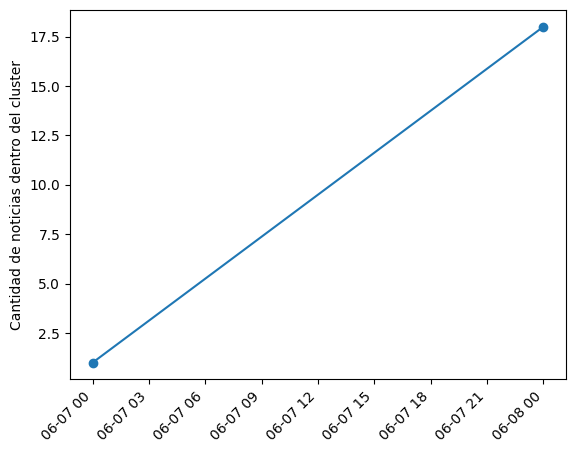

366   Acreedores que brindan Respaldo, llegaron a un acuerdo que les permitirá a los miembros de los tres grupos de acreedores apoyar la propuesta de reestructuración de deuda de Argentina y otorgarle a la República un alivio de deuda significativo


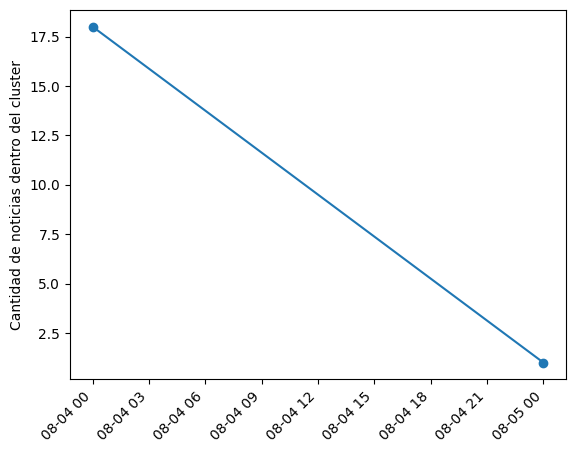

282   Unidos en defensa de la verdad y la transparencia


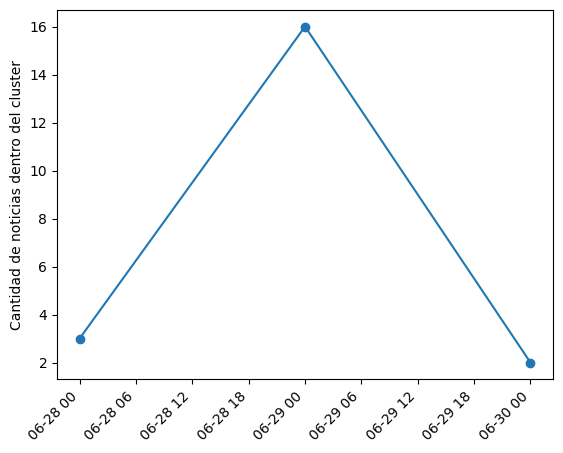

187   Resolvimos una deuda imposible en la mayor crisis económica que se recuerde y en el medio de una pandemia; ahora, tenemos despejado el horizonte


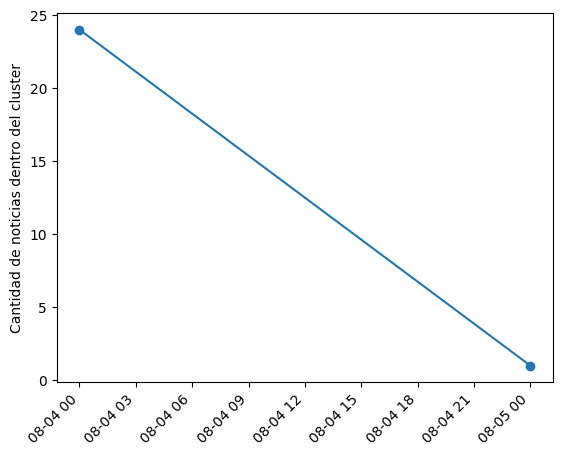

68   ningún organismo de inteligencia podrá obtener información, producir inteligencia o almacenar datos sobre personas, por el solo hecho de su raza, fe religiosa, acciones privadas, u opinión política, o de adhesión o pertenencia a organizaciones partidarias, sociales, sindicales, comunitarias, cooperativas, asistenciales, culturales o laborales, así como por la actividad lícita que desarrollen en cualquier esfera de acción


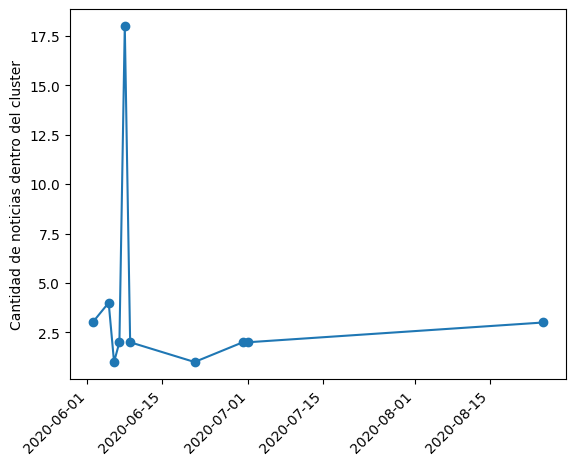

14   proyecto que están evaluando en un contexto complejo para las economías familiares


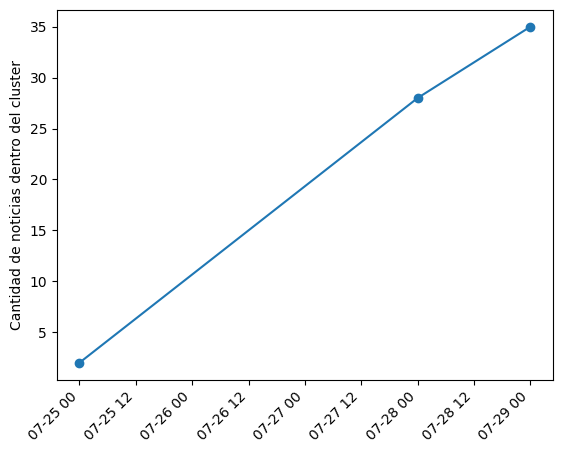

434   La legítima defensa de los derechos laborales de los policías de la Provincia de Buenos Aires se transformó con el paso de las horas en una amenaza real al normal funcionamiento del Estado


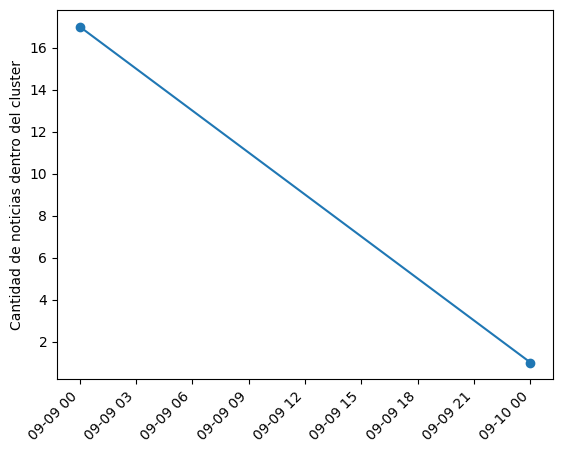

109   la industria nacional, los pequeños y medianos empresarios y con los trabajadores


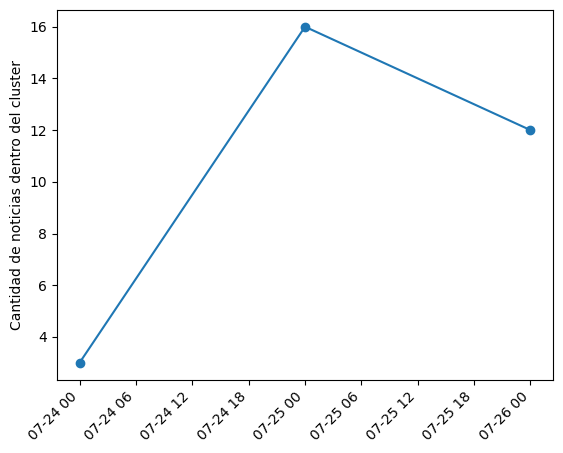

19   que se mueran todos los que tengan que morirse


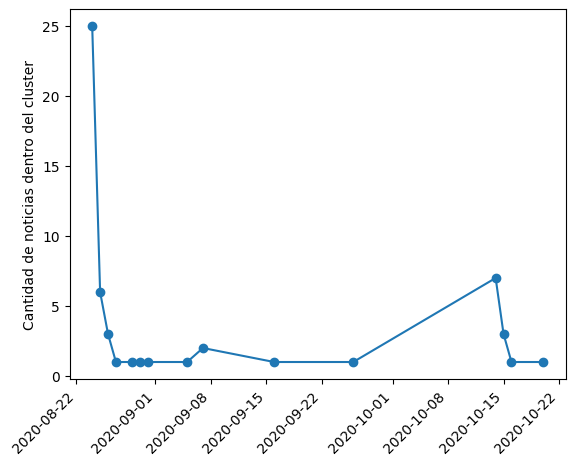

98   el objetivo de esta suba es sostener la actividad de producción de la compañía teniendo en consideración las particularidades del contexto macroeconómico del país


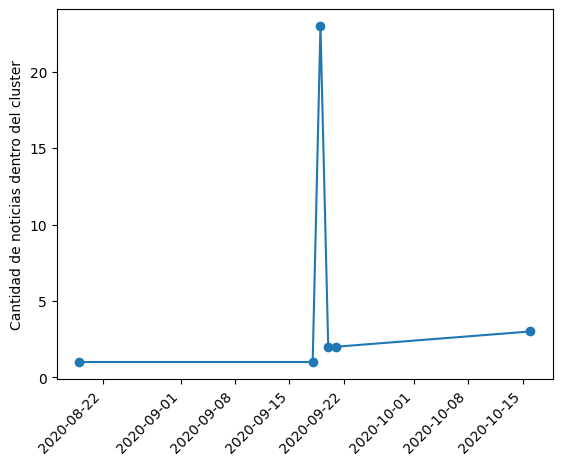

500   El gobierno de los tarifazos y los impuestazos ya se fue, se fue el diez de diciembre


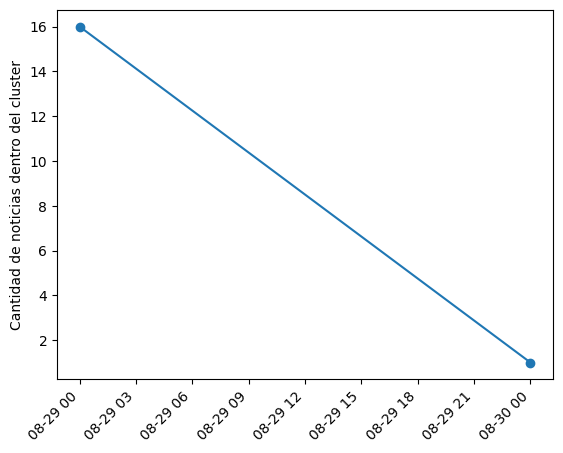

198   , indicó Fernández. También solicitó a la comunidad internacional «cumplimentar las solicitudes contenidas en las cédulas rojas de Interpol ante la eventual presencia de un imputado en sus territorios, algo que Argentina jamás dejó de reclamar


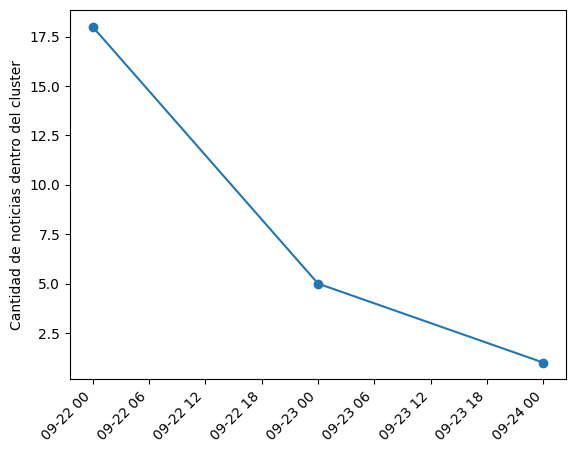

203   aportantes del PTS en la provincia de Buenos Aires


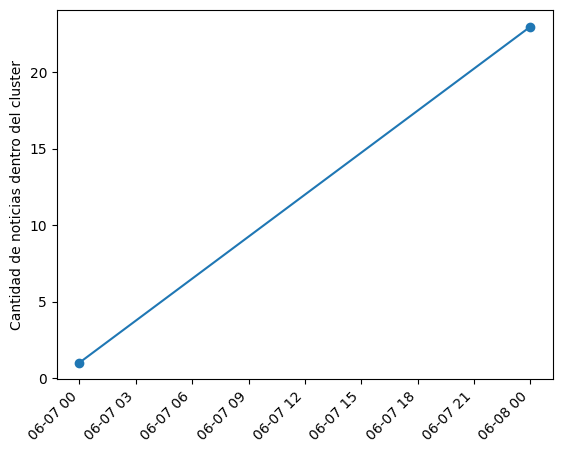

295    intrigas acerca de la relación con su vice. 


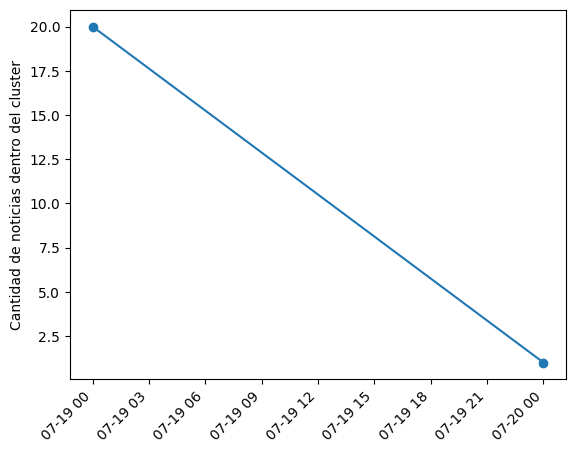

322   Es ridículo que piensen que el año que viene va a haber elecciones. La gente no lo sabe, no lo lee, o se olvida, pero entre el ’30 y el ’83 hemos tenido 14 dictaduras militares, quien ignore hoy que el militarismo se está poniendo nuevamente de pie en América no conoce lo que está pasando


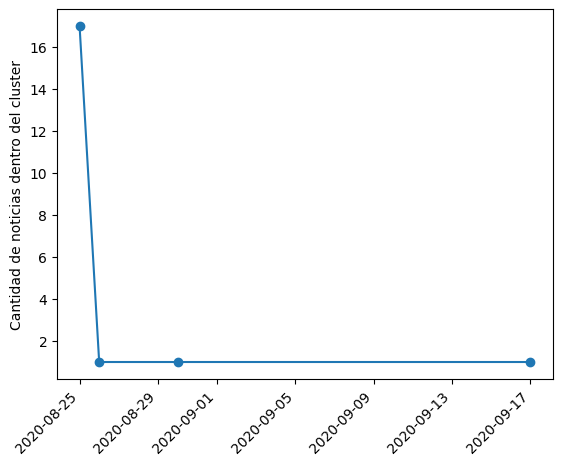

164   Se dispone con carácter de medida autosatisfactoria y previa presentación de contracautela, que los administradores naturales de la sociedad concursada, designados conforma la última Asamblea Ordinaria de accionistas, continúen ejerciendo las funciones para las cuales fueron designados, conforme al estatuto de la misma


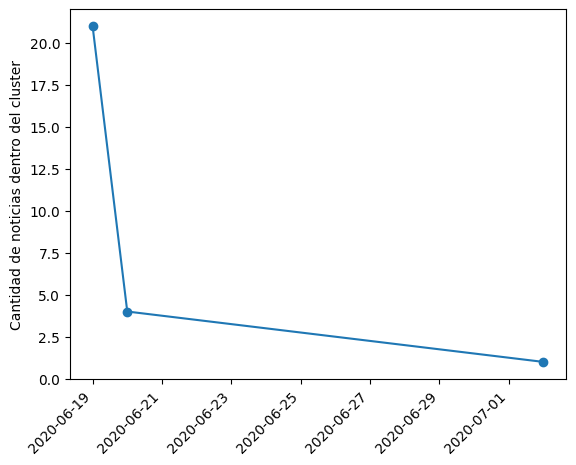

286   Ante los hechos de público conocimiento, me dirijo a Usted para pedir disculpas por mi conducta durante la sesión especial remota del día 24 de septiembre del corriente. No fue de ningún modo mi intención faltar el respeto a esta Honorable Cámara, a mis pares diputados y diputadas, ni al pueblo salteño que me eligió


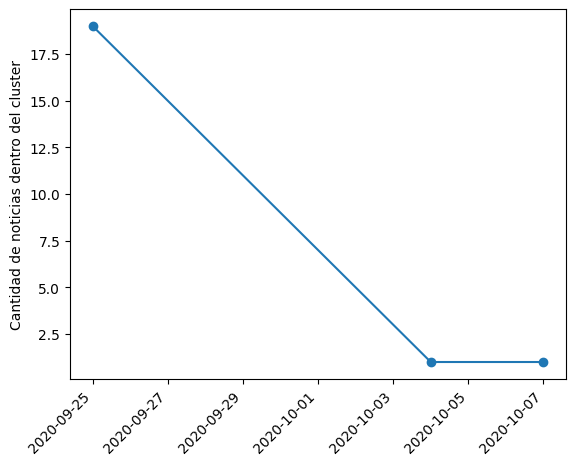

32   incumplimiento del distanciamiento social, preventivo y obligatorio


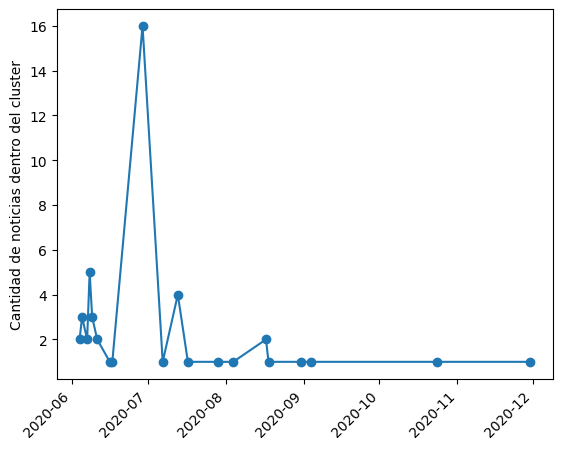

97   anida la misma vocación de construir una industria nacional y un contrato social que permita alcanzar ese futuro y la decisión de hacerlo


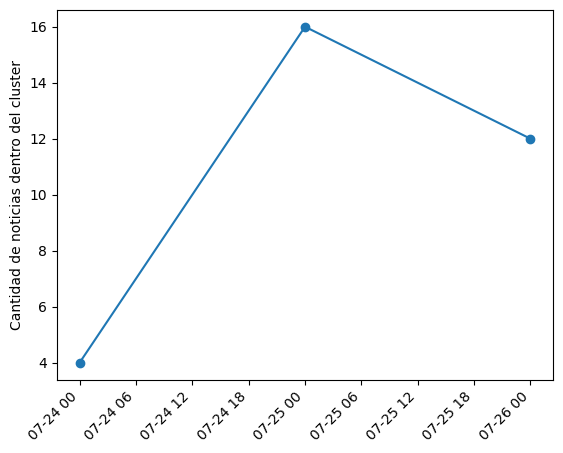

10   Es parte de una enorme planificación inteligente y empática de un Estado que quiere proteger y cuidar a sus argentinos y argentinas


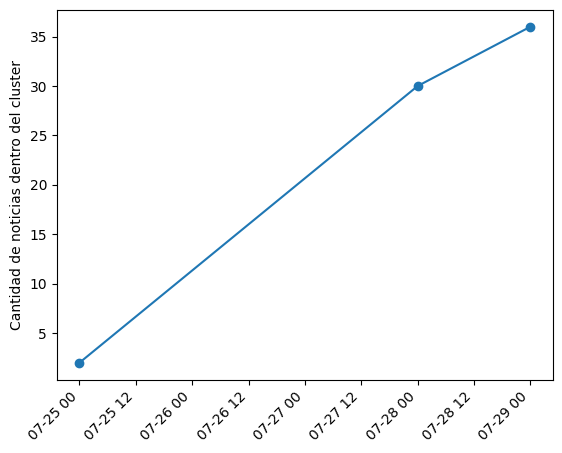

185   Este aumento se encuentra en línea con la decisión de ir recortando brechas entre la Capital Federal y el resto de las provincias


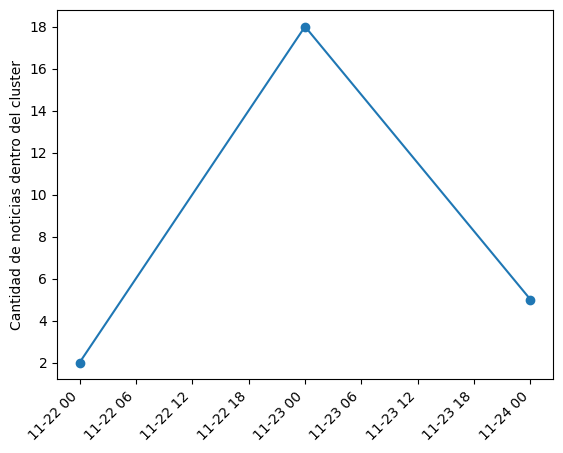

204   Cuadros Formados y Capacitados del PTS


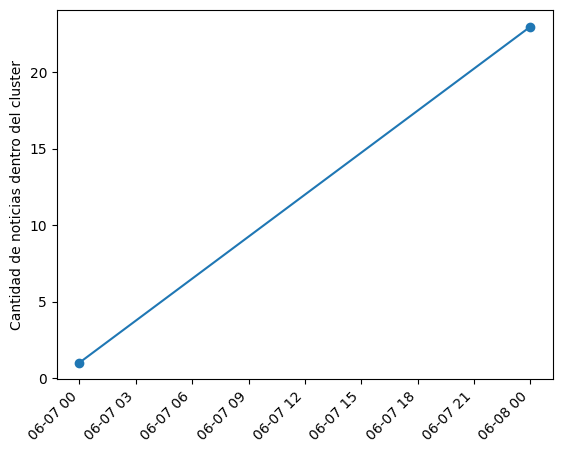

289   , dijo el presidente, quien señaló que no es un entusiasta de la intervención del Estado en la economía. 


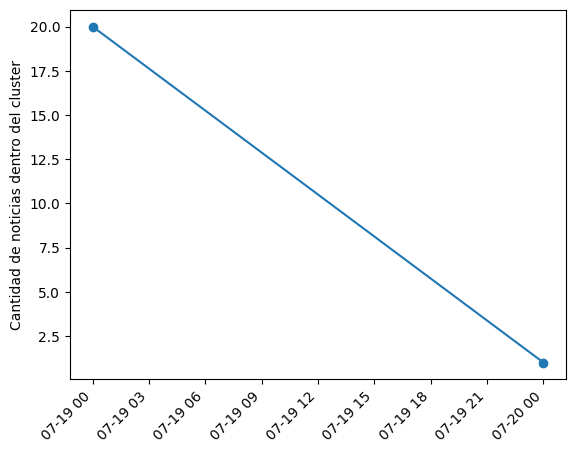

100   Que la lealtad a las convicciones, al pueblo y a la Patria sigan inalterables en tiempos de pandemia. Con la misma pasión y con la misma esperanza


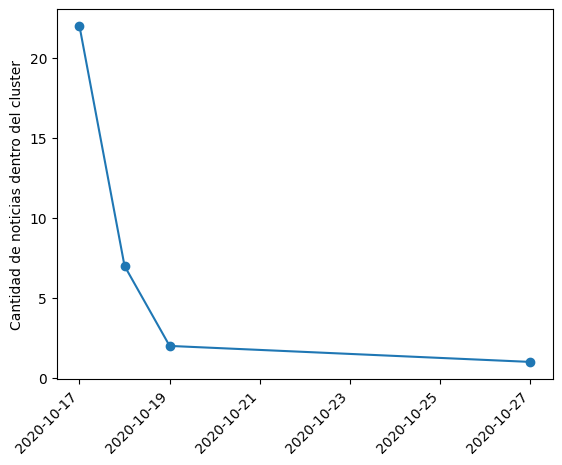

248   Ha agravado la controversia por los llamados a la explotación ilegal y unilateral de los recursos naturales renovables y no renovables en el área. También insiste con la injustificada y desmedida presencia militar en las Islas, que no hace más que traer tensión a una región caracterizada por ser una zona de paz


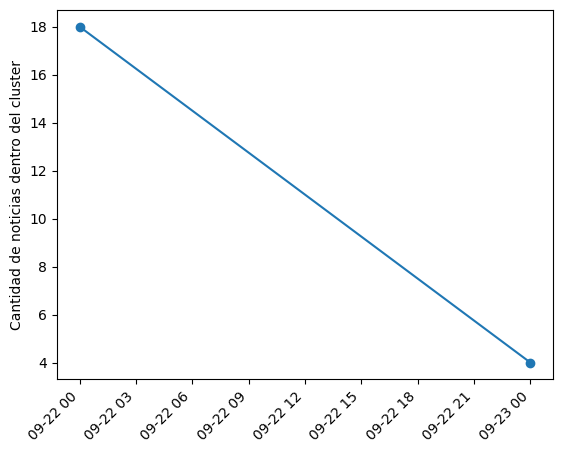

259   . El presidente dijo que 


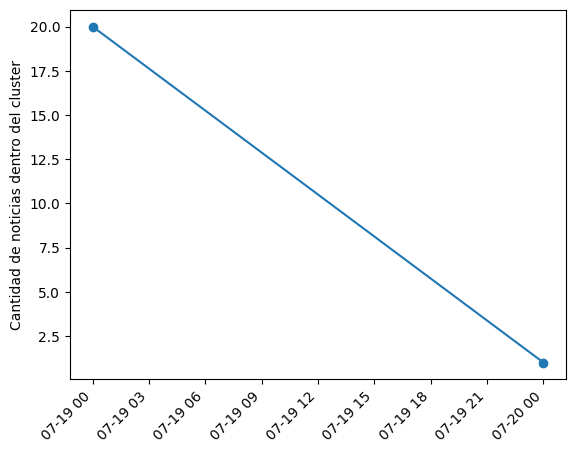

202   Imaginen lo que hubiera sido esta pandemia con (el ex presidente) Mauricio Macri gobernando. Una catástrofe


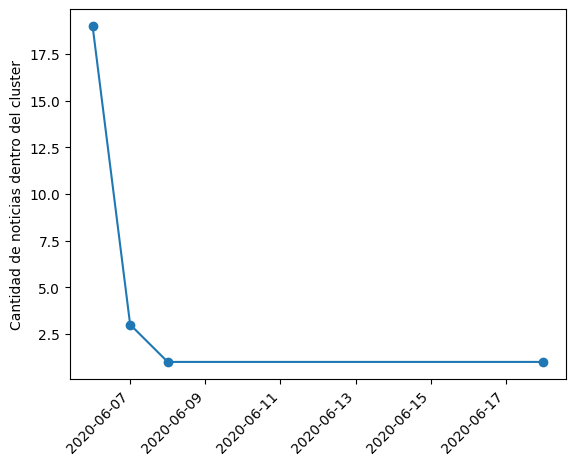

11   ladrona de la república Argentina


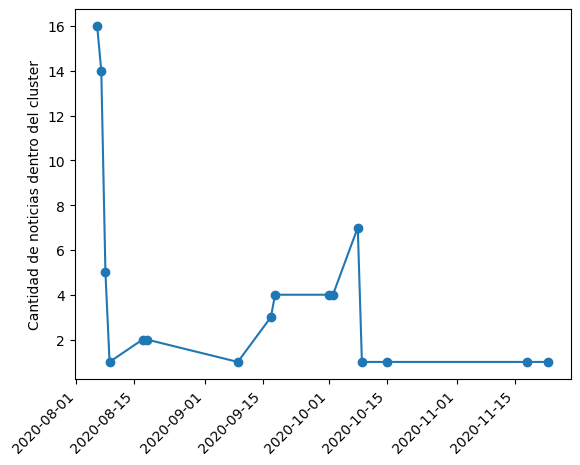

40    y apuntó a Fernández. 


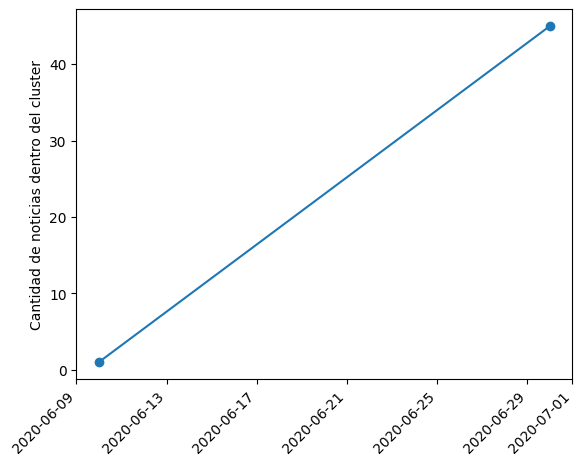

104   sin embargo, el análisis también sugiere que existe solo un margen limitado para incrementar los pagos a los acreedores privados y al mismo tiempo cumplir con los umbrales de deuda y servicio de la deuda y otras condiciones establecidas en la nota técnica de marzo


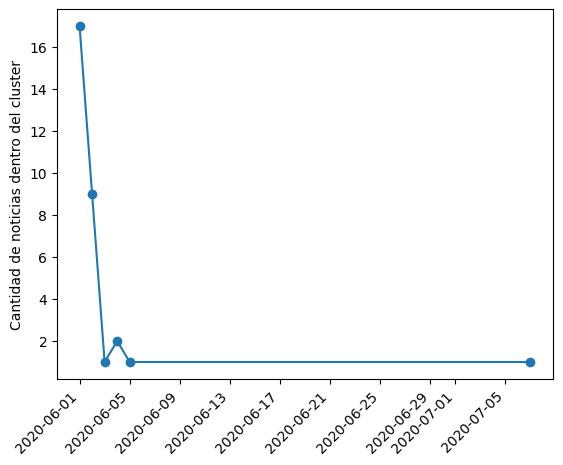

58   maneja una línea de pensamiento muy alineada con la del gobierno. Es muy crítico de la gestión de Cristina Fernández de Kirchner


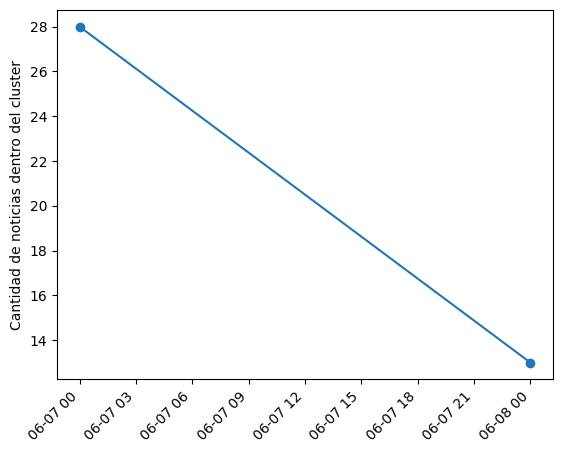

86   Es ridículo que piensen que el año que viene va a haber elecciones ¿Por qué va a haber elecciones?


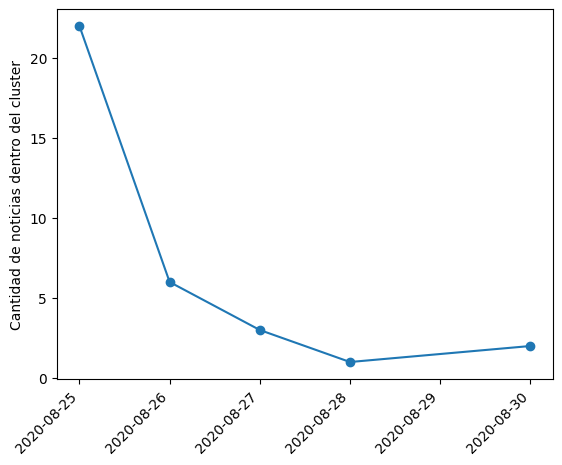

315   el Reino Unido persiste en su actitud de desoír el llamado a reanudar las negociaciones respecto de la disputa territorial y ha agravado la controversia por los llamados a la explotación ilegal y unilateral de los recursos naturales renovables y no renovables en el área, acción contraria a la resolución 31/49 de esta Asamblea


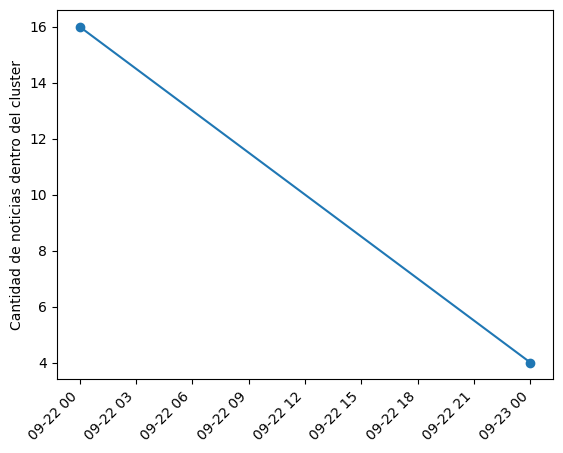

227   Consciente de la responsabilidad que mi cargo representa, pongo a disposición mi renuncia como diputado nacional, y seguiré trabajando por mi querida provincia de Salta y para que Argentina se ponga de pie.


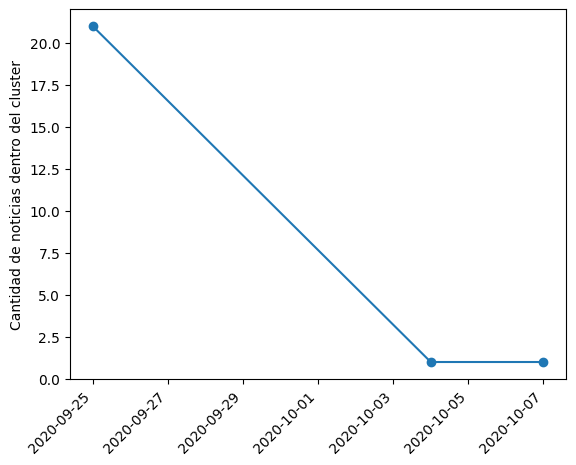

8   Orgulloso de los miles de argentinos que salieron ayer para decirle basta al miedo y al atropello, y sí al trabajo, al respeto y a la libertad


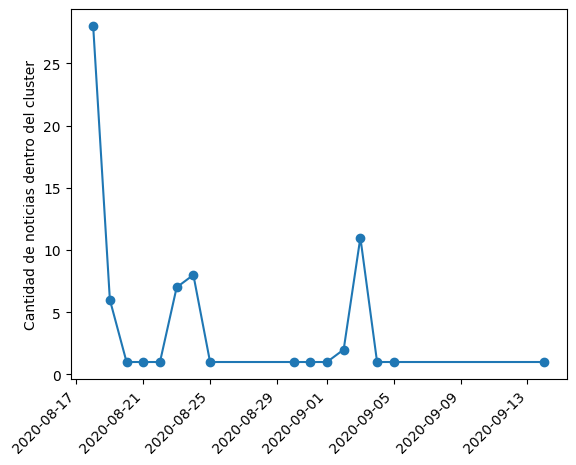

37   a la Argentina le fue mejor con el coronavirus que con el Gobierno de (Mauricio) Macri


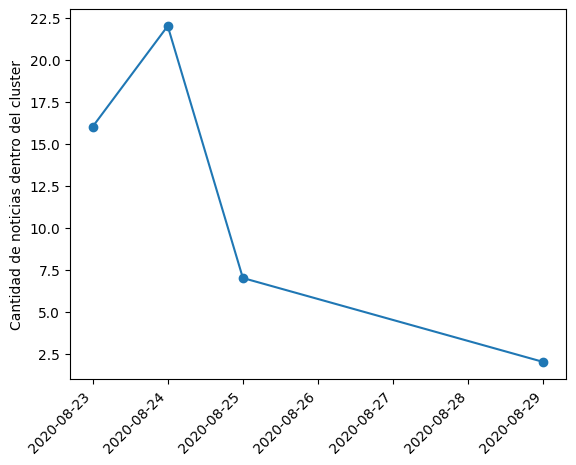

20   , enfatizó. El gobernador aseguró que 


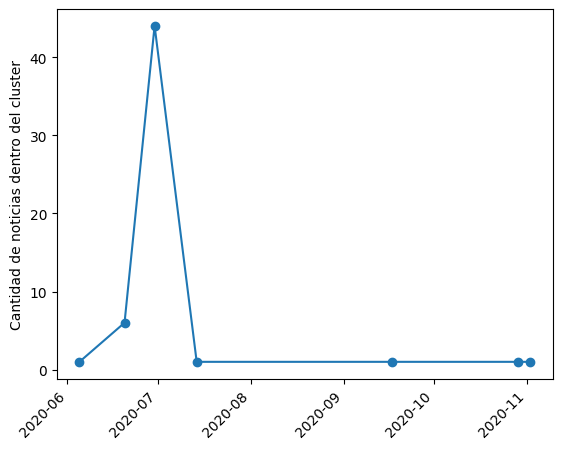

137   en 2017 una foto suya de la gira de Iron Maiden formó parte de la muestra anual de Argra


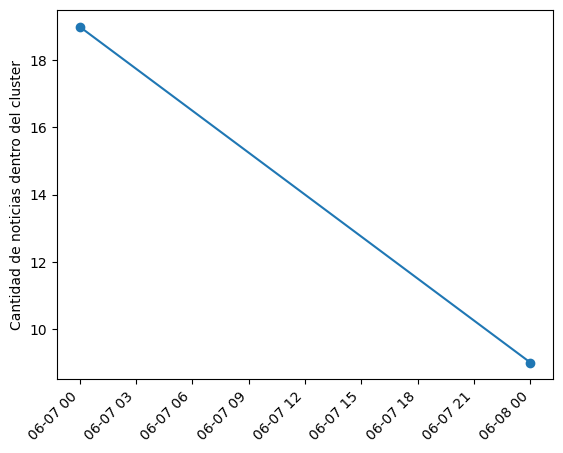

103   .   López concluyó: 


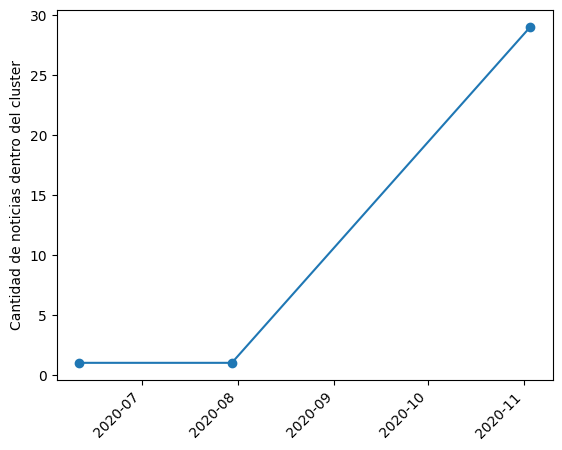

331   .  -Cristina Kirchner: El presidente atribuyó a 


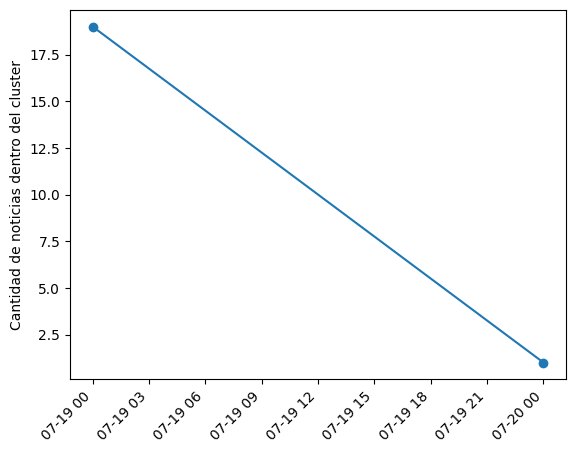

235   Empezamos hoy un tiempo distinto, empezamos el tiempo de la reconstrucción de la Argentina. A esta Argentina derrumbada la vamos a poner de pie. A esta Argentina que se enferma la vamos a curar nosotros, sin odios ni rencores


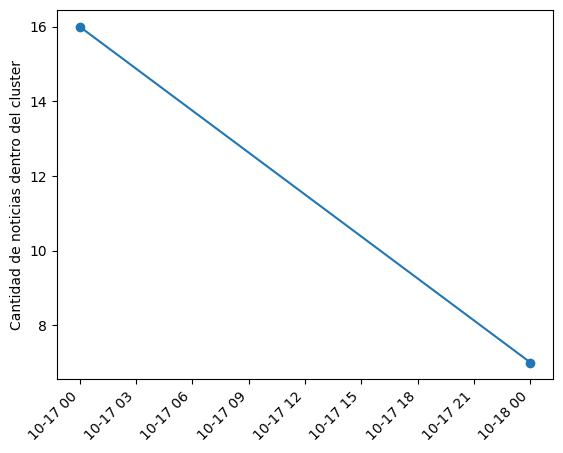

84   Quiero contarles que hace un par de horas me confirmaron el diagnóstico de COVID-19 positivo. Agradezco a todos los que me escriben con preocupación. Estoy bien, cumpliendo con el aislamiento y las indicaciones médicas correspondientes. Cuídense y cuiden a sus familias.


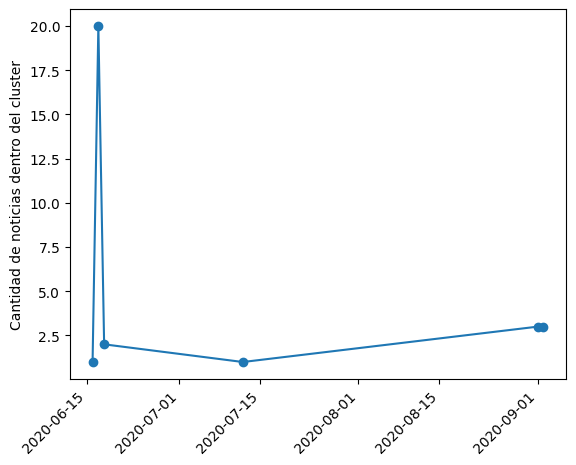

370   Fortalecimos el sistema de salud en tiempo récord con una Argentina quebrada que dejó Macri. Recordemos que nos habían dejado sin ministerio de Salud


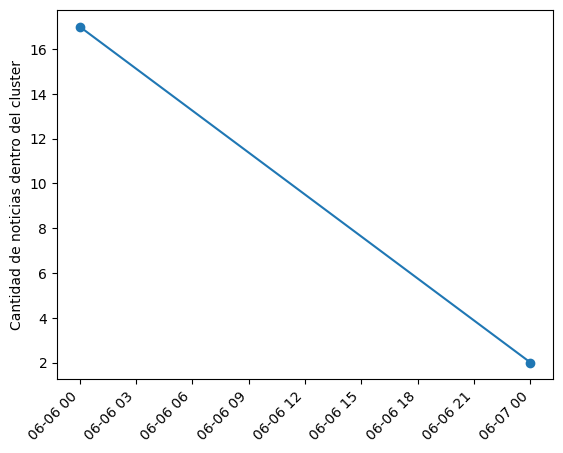

311   Quiero contarles que hace unas horas me confirmaron el diagnóstico de COVID-19 positivo. Siempre tomé los recaudos necesarios para ir y volver y cada vez que ingresé a mi provincia me puse a disposición de las autoridades correspondientes, siguiendo el protocolo


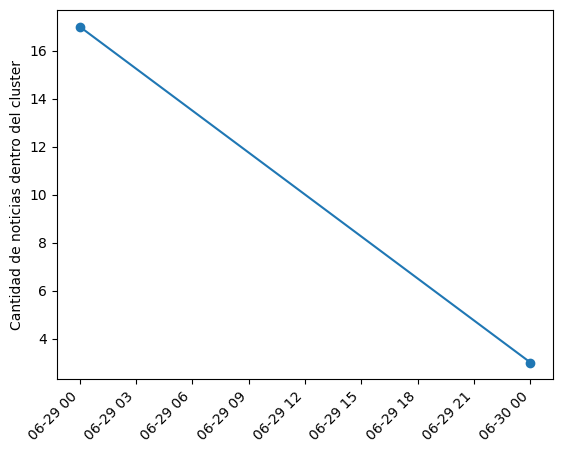

83   Para terminar -dijo Fernández- quiero reafirmar los legítimos e imprescriptibles derechos de soberanía de la República Argentina sobre las Islas Malvinas, Georgias del Sur, Sandwich del Sur y los espacios marítimos circundantes, los cuales forman parte integrante del territorio nacional argentino. Y que se encuentran ocupados ilegalmente por el Reino Unido desde hace ya más de 187 años


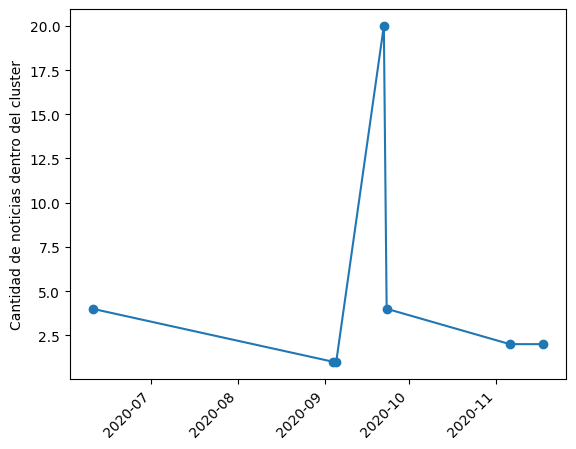

297   declara de utilidad pública y sujetas a expropiación dos superficies de terreno ubicadas en la localidad de La Ciénaga, departamento Belén


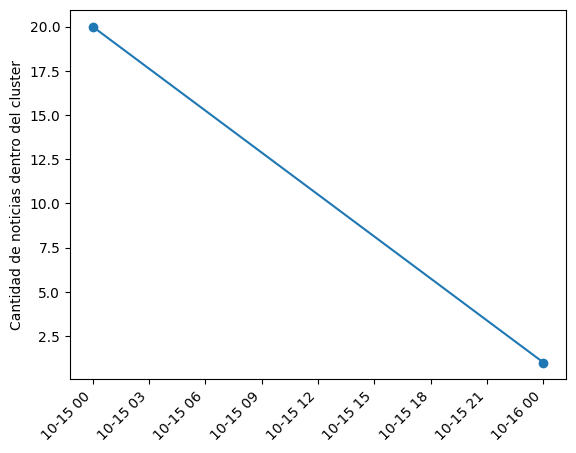

62   Se destaca que en Facebook la única página de políticos a la que le dio 'Me Gusta' es a la de Laura Alonso


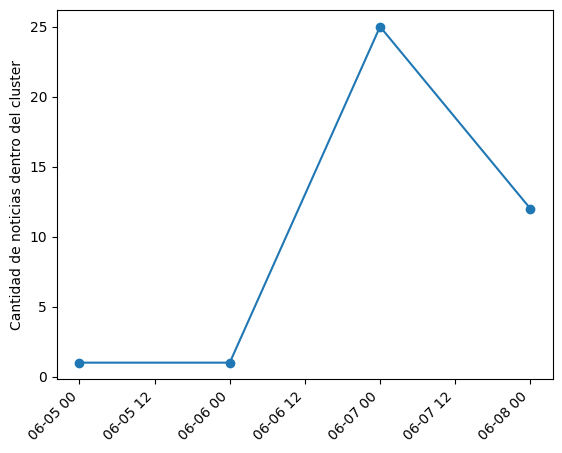

77   Convenio de transferencia progresiva a la Ciudad Autónoma de Buenos Aires de facultades y funciones de seguridad en todas las materias no federales ejercidas en la Ciudad Autónoma de Buenos Aires


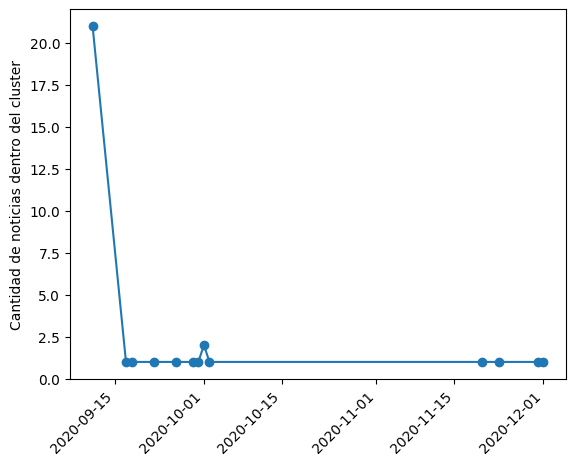

515   El cobro se va resolviendo caso por caso. No son todos iguales


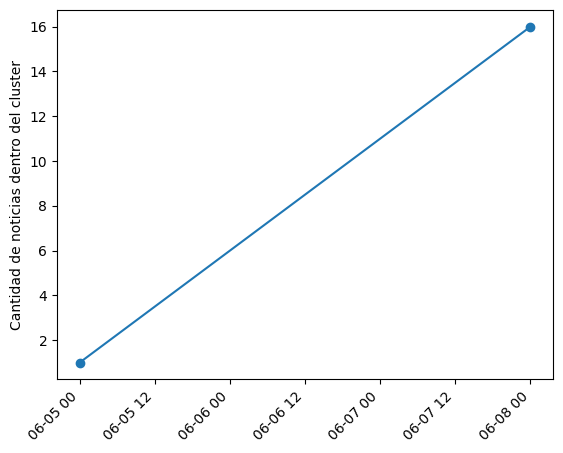

209   Hay que pararse prudentemente y si los argentinos cumplimos con todos los requisitos, la actividad económica se puede mantener de la mejor forma


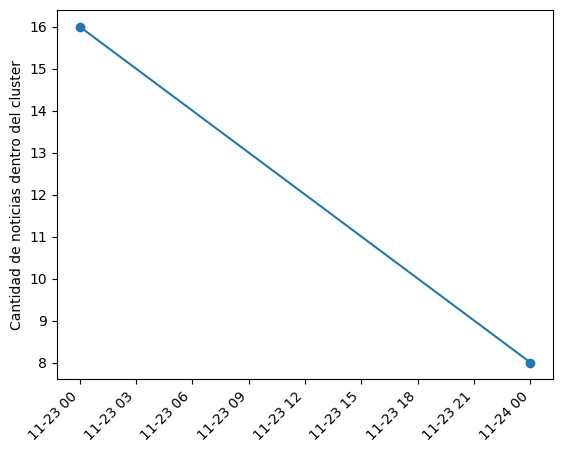

210   Nosotros calculamos que después del 10 de diciembre, o a mediados de diciembre, vamos a estar abriendo el turismo


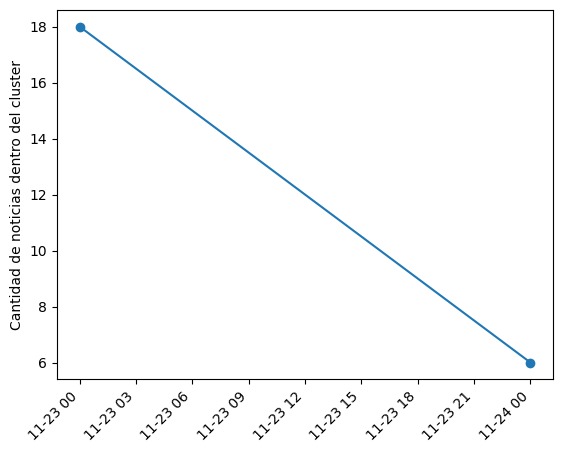

251   Los gobernadores y las gobernadoras estamos juntos al Presidente (Alberto Fernández) y a cada intendente en todo el país al frente de esta lucha para reducir los daños y salvar la mayor cantidad de vidas posible


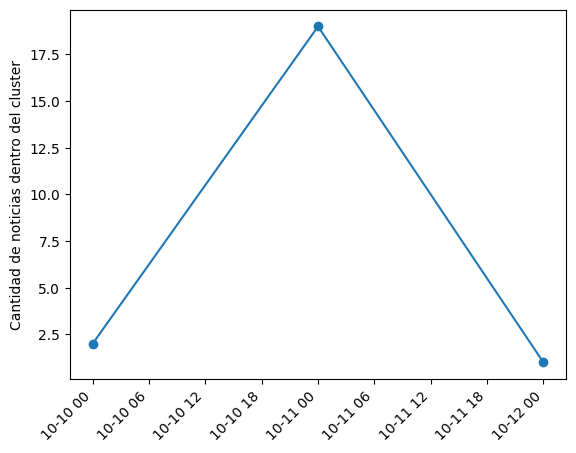

218   cada vez que hubo marchas, 15 días después crecieron los casos de coronavirus


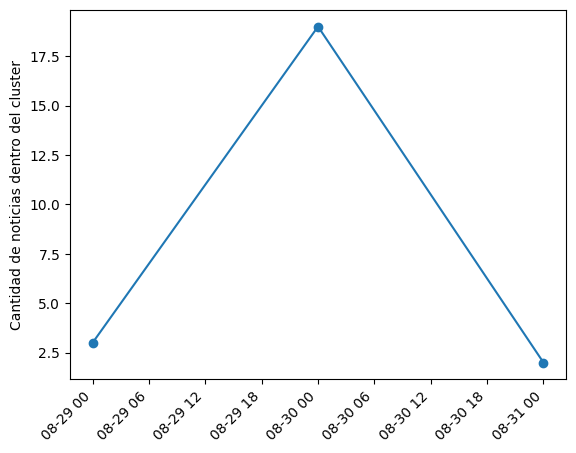

428   Grupo de economistas de izquierda con fuerte presencia en medios alternativos y de corte kirchnerista como PáginaI12. Asimismo, ha realizado publicaciones en el portal de Agencia Paco Urondo, en las cuales se ha manifestado en contra del libre comercio


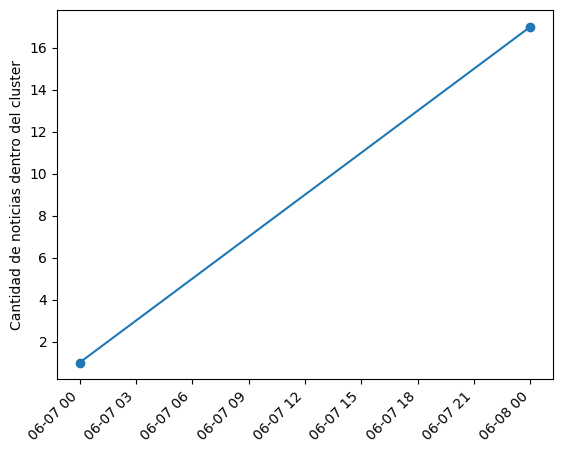

375   opositora a la OMC y al G-20. Autodenominada 'alter-mundista'


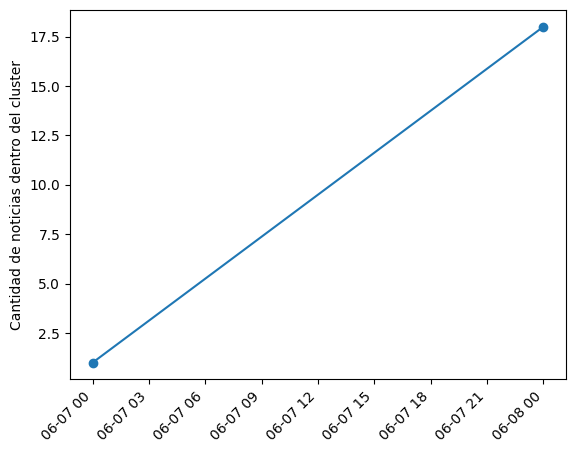

360   no queda otro camino posible más que el de la expropiación


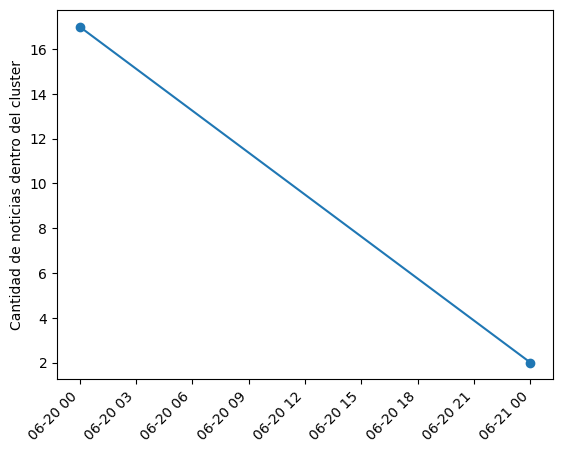

184   Unidos vamos a salir adelante


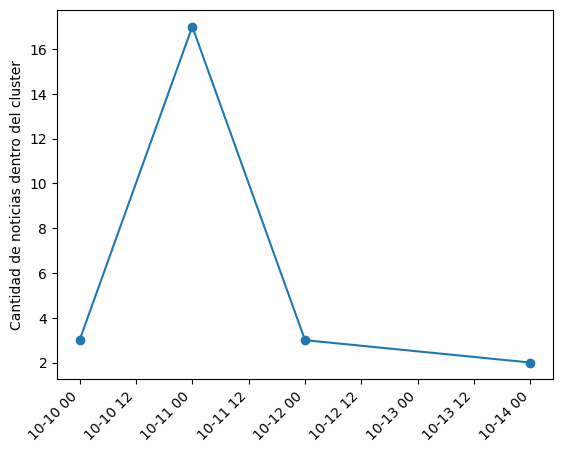

178   vine acá a terminar con los odiadores seriales. Vine a abrir los brazos para que todos nos unamos en busca de este destino común. No vengo a instalar un discurso único. Sé que hay diversidad, y la celebro; de todo tipo, de género e ideológica. Lo que necesito es que esa diversidad sea con responsabilidad; no mentir y respetarnos


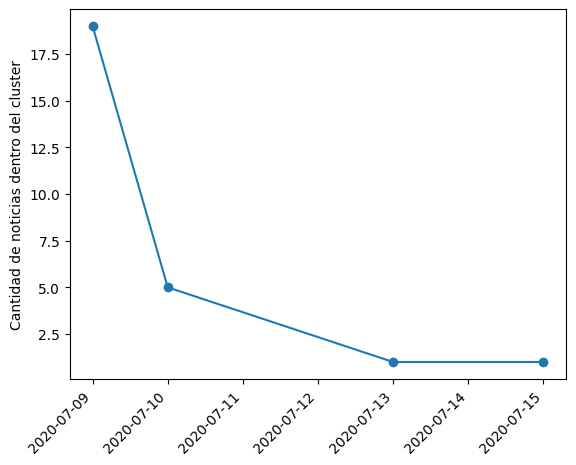

365   Todos los acreedores deben saber que no vamos a postergar a ningún argentino para pagar una deuda que no podemos pagar


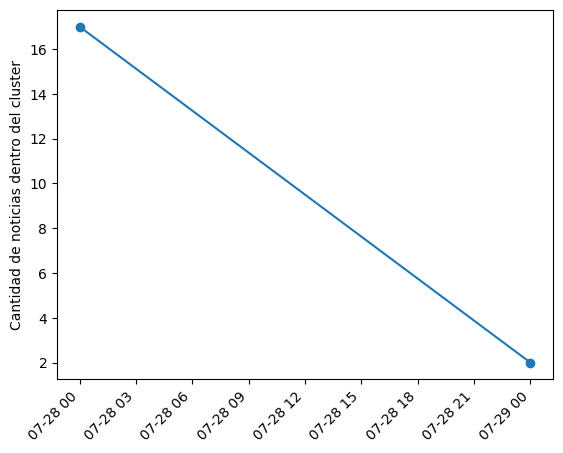

172   Un nuevo nombramiento, precedido de igual acuerdo, será necesario para mantener en el cargo a cualquiera de esos magistrados, una vez que cumplan la edad de setenta y cinco años. Todos los nombramientos de magistrados cuya edad sea la indicada o mayor se harán por cinco años, y podrán ser repetidos indefinidamente, por el mismo trámite.


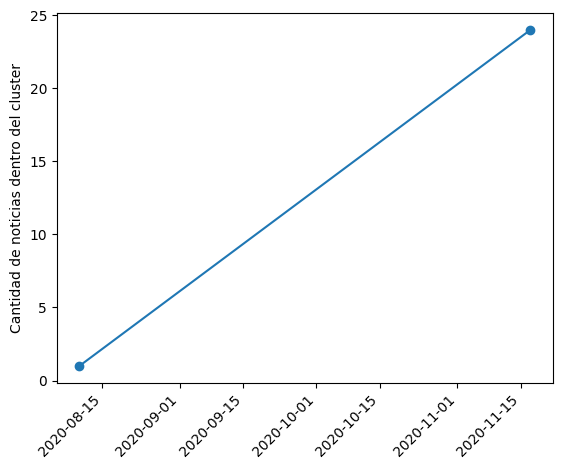

12   Desde el Gobierno ha comenzado a hablarse de la creación de un ingreso básico universal, con carácter permanente. De avanzar en esta dirección, para su puesta en marcha es preciso determinar un monto por beneficiario adecuado con el objetivo de erradicar al menos la pobreza extrema y mejorar la distribución del ingreso


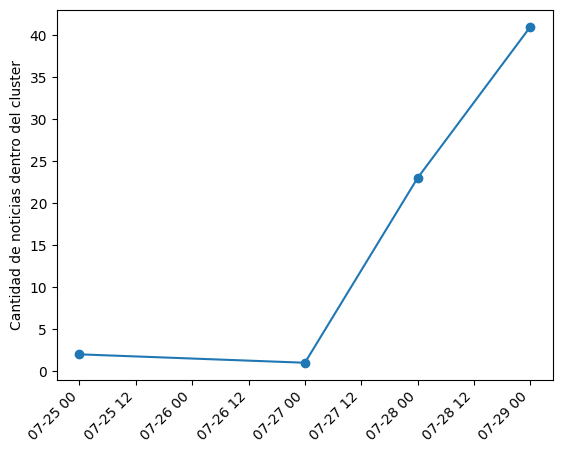

90   Mesa de Encuentro Libertador General San Martín. Agustín Rossi 


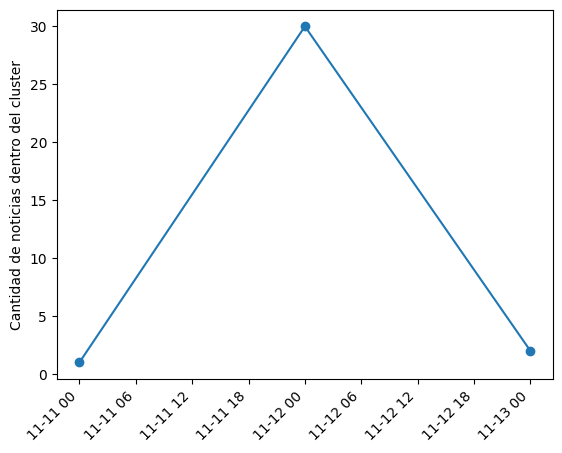

57   cuando se mandan cagadas y venden falopa, yo los tengo que cubrir, como me están vendiendo falopa en las ambulancias


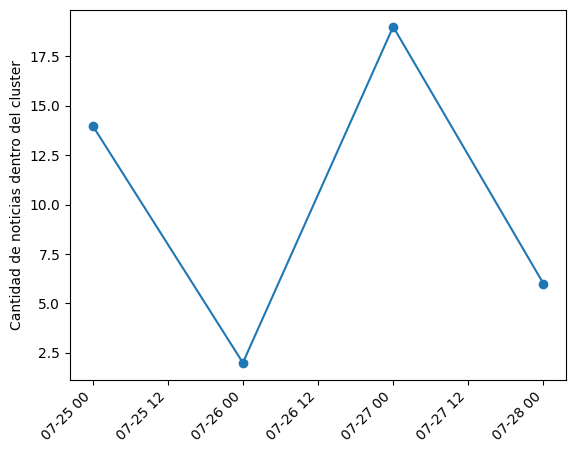

200   Vamos a buscar los consensos para asegurar los acuerdos que Argentina asuma


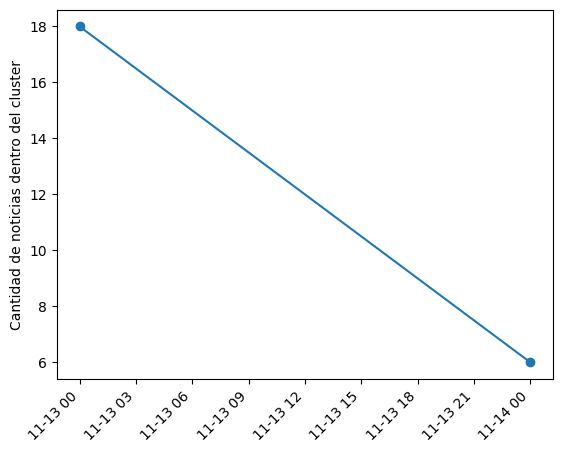

364   . Fuente: Infobae    -Expropiación de YPF a Repsol: El presidente defendió la decisión adoptada en 2012 por el gobierno de Cristina Kirchner 


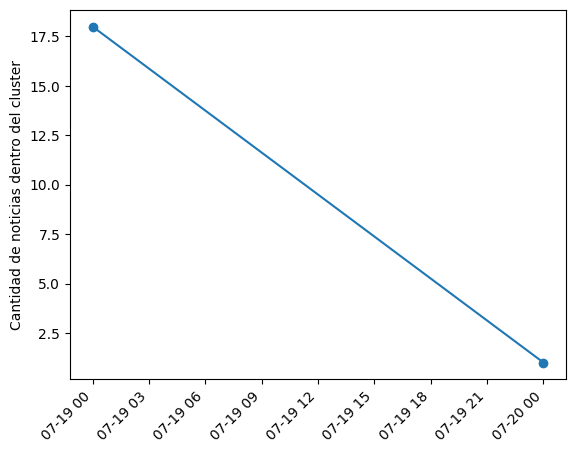

250   nuevos embargos sobre cuentas bancarias, excepto para el caso de los procedimientos de comprobación y pronto pago de créditos laborales, y créditos de origen alimentarios


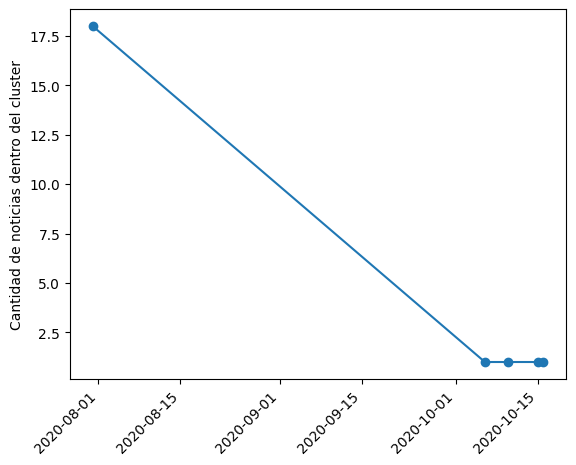

3   el aislamiento social, preventivo y obligatorio ha creado una serie de desafíos


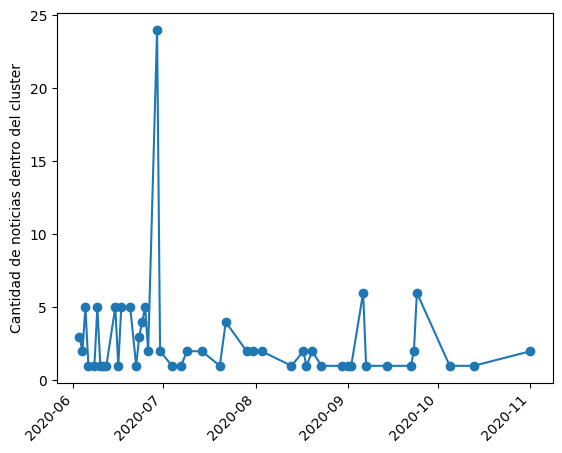

296    habla con Cristina y escucha sus ideas. 


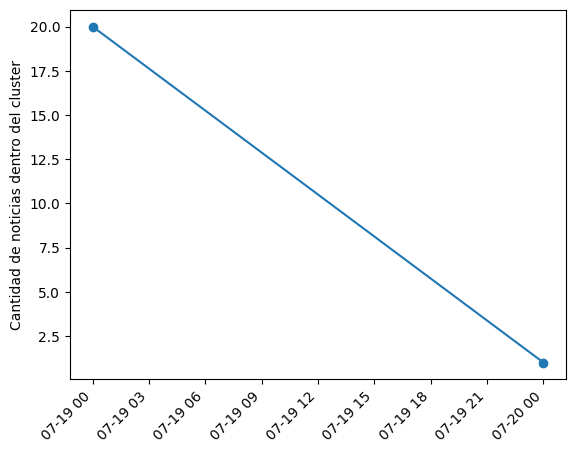

188   conformación de un órgano de Intervención


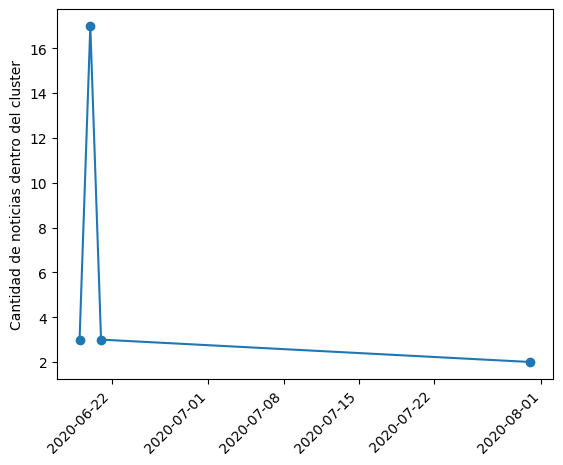

125   cuando empiece a pagarse el IFE 3 tenemos que hacer el empalme y empezar a pagar esta renta universal, y lo venimos conversando con actores políticos, sociales y sindicales


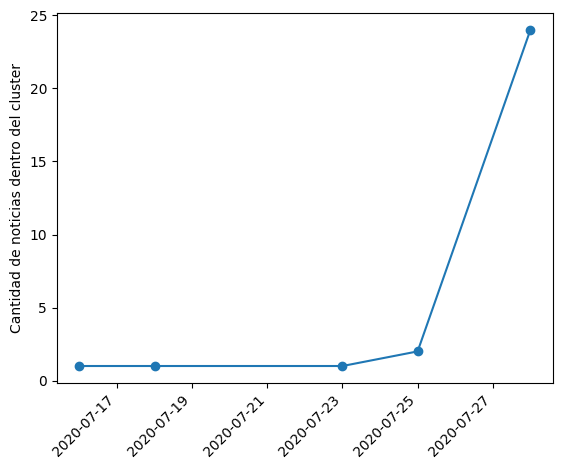

105   Dí positivo de coronavirus. Como sociedad, hoy atravesamos el momento más difícil porque nos acercamos al pico de contagios. Les pido que se cuiden y que tratemos de minimizar el riesgo entre todos y todas. Por favor, quédense en sus casas todo lo que puedan


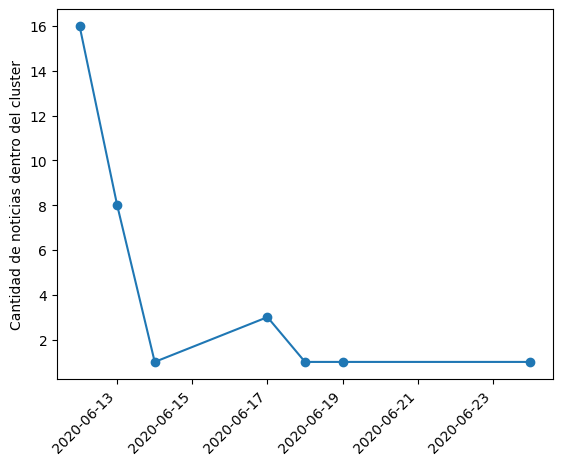

6   Ingreso Familiar de Emergencia - Consulta de pago


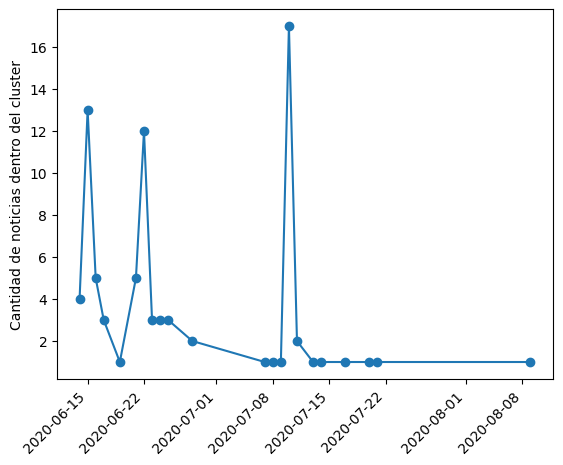

108   hubo un antes y un después de Néstor


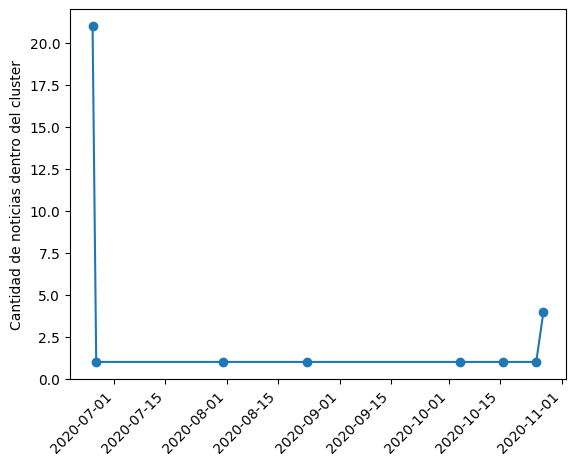

9   promoverá la generación de lotes con servicios para ampliar el acceso al suelo urbanizado; esto quiere decir que se formalizarán relaciones con las provincias y municipios para que se puedan crear bancos de tierra urbanizada y facilitar el acceso a la vivienda


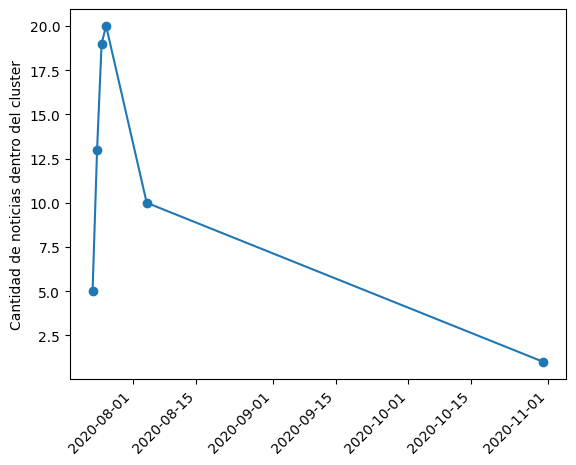

359   una muy mala señal en este escenario tan complejo


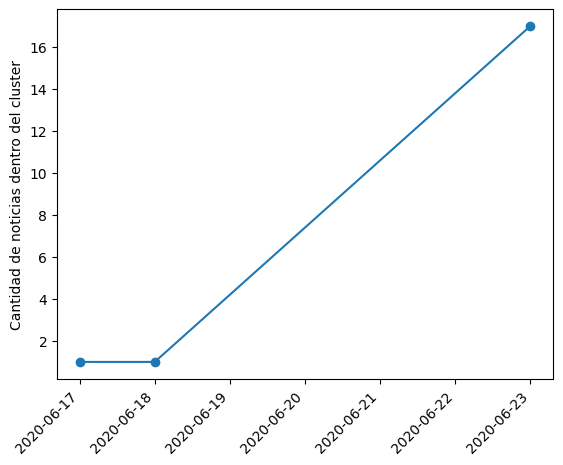

186   se obtiene de fuentes propias que durante las actividades llevadas a cabo en relación al plenario de mención, se establecieron las pautas generales de armado de comisiones que tendrán como misión operativa el entorpecimiento de la conferencia OMC a desarrollarse durante el corriente año, a fines de obstaculizar el desembarco del G-20 en el país


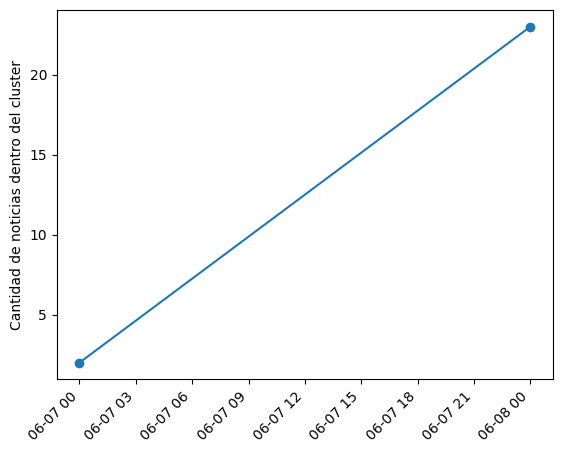

255   Motiva el pedido la solicitud que me hiciera llegar el canciller de Finlandia, quien ha garantizado el buen comportamiento de la señora Chavda de acuerdo a los usos y costumbres locales


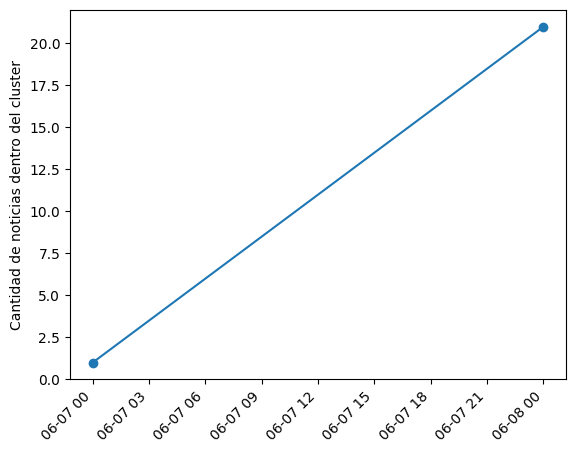

135   Estamos a tiempo. Para defender el presente y para ganar el futuro


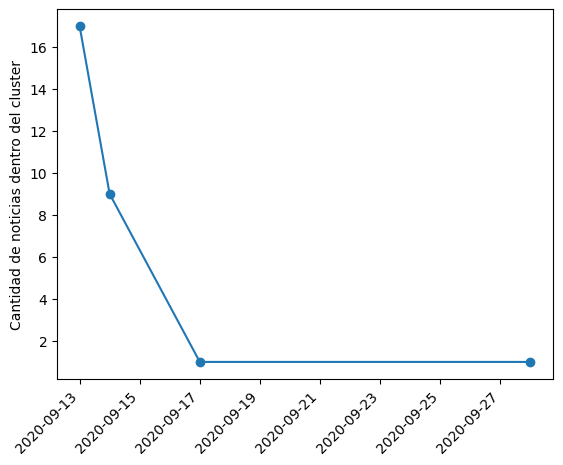

136   es miembro de la Red Argentina para el Desarme


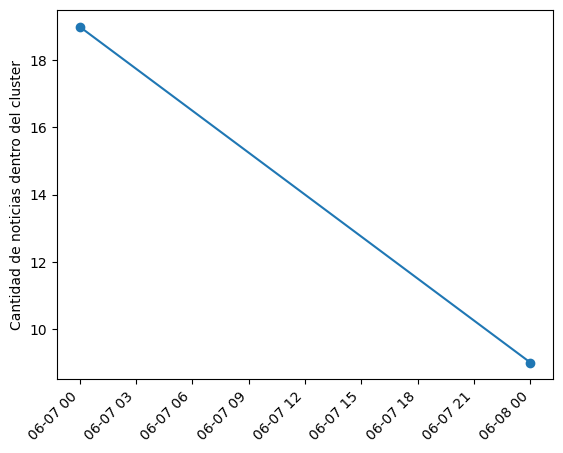

160   Esta decisión se da en pos de avanzar con los objetivos de producción de la compañía, teniendo en consideración las particularidades del contexto macroeconómico del país


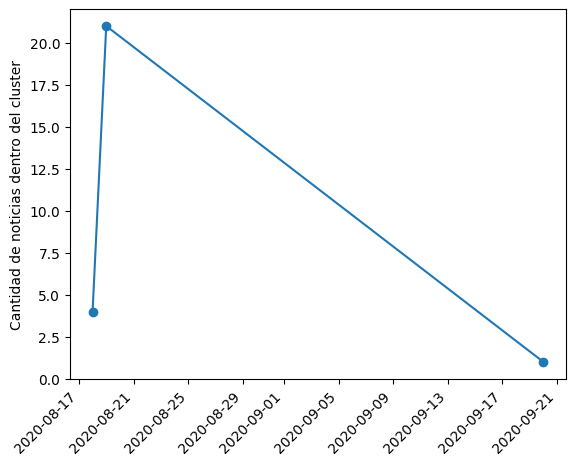

85   manifiesta una postura cercana al oficialismo


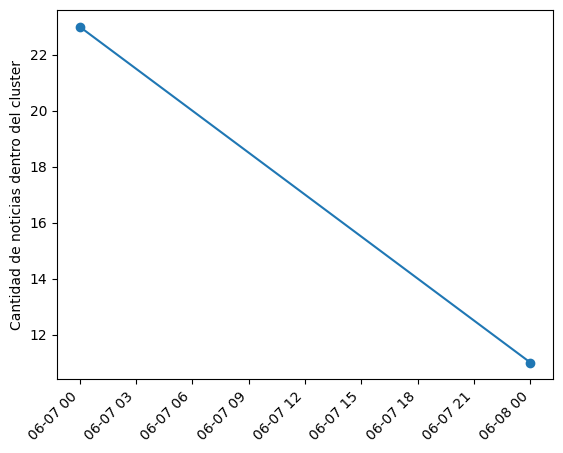

422   Nosotros no vamos a estatizar deudas privadas, ni a salvar accionistas, ni a avalar con el Estado un desfalco


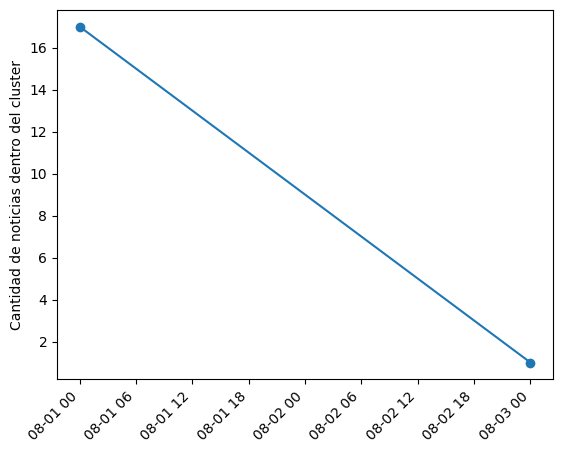

51   La actualización de precios -añadió- tendrá en esta oportunidad como en el futuro el objetivo de recomponer asimetrías históricas a nivel federal, recortando brechas entre la Capital Federal y el interior del país


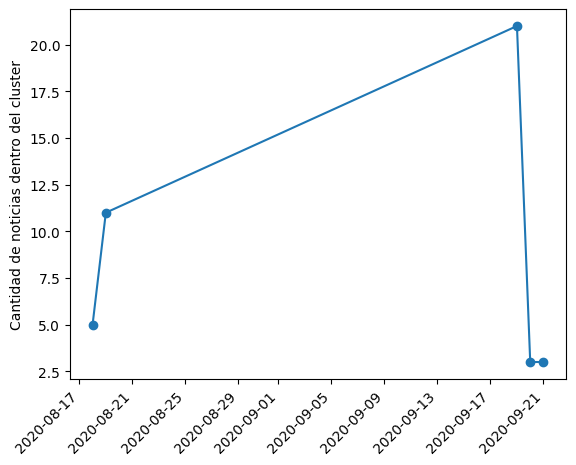

321   . No está en la cabeza de ninguno de nosotros andar expropiando empresas


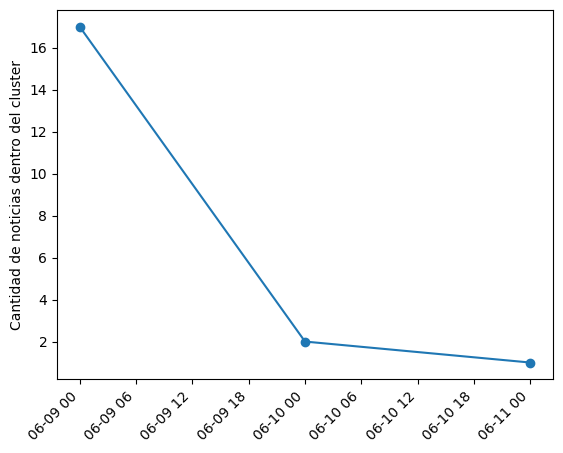

122   podemos inferir que es kirchnerista


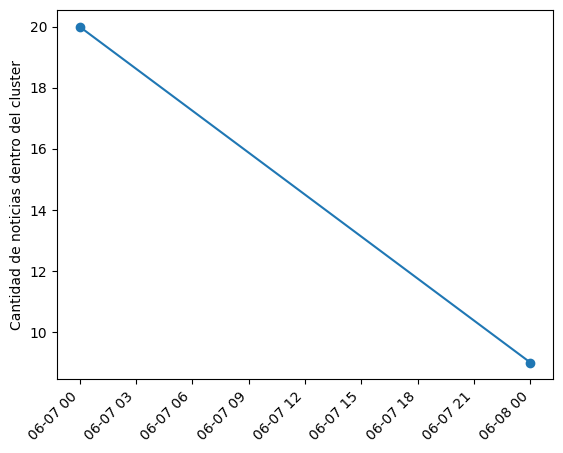

43   incrementar su producción hasta el máximo de su capacidad instalada y a arbitrar las medidas conducentes para asegurar su transporte, distribución y comercialización en todo el país durante el período que dure la emergencia sanitaria


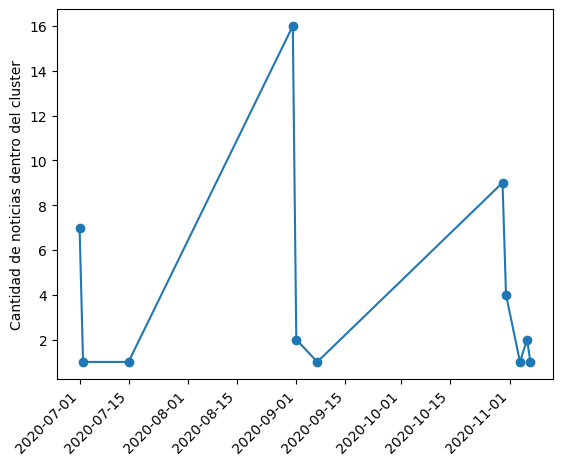

5   es un crimen de la mayor gravedad institucional


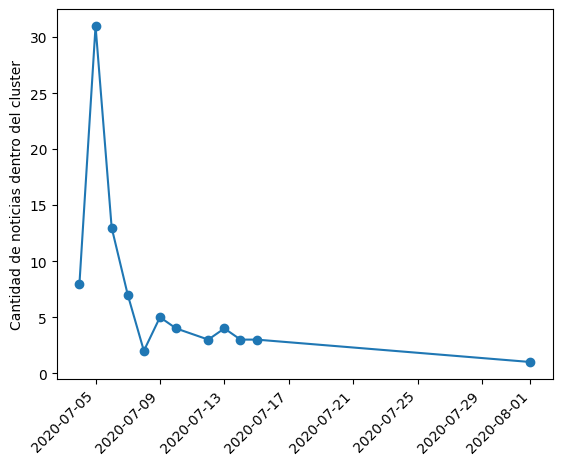

192   en pleno derecho y sin requerimiento de parte los procesos de ejecución de cualquier tipo de garantías de obligaciones financieras; la totalidad de las subastas judiciales y extrajudiciales, incluidas las hipotecarias y prendarias; la prescripción y caducidad de los créditos


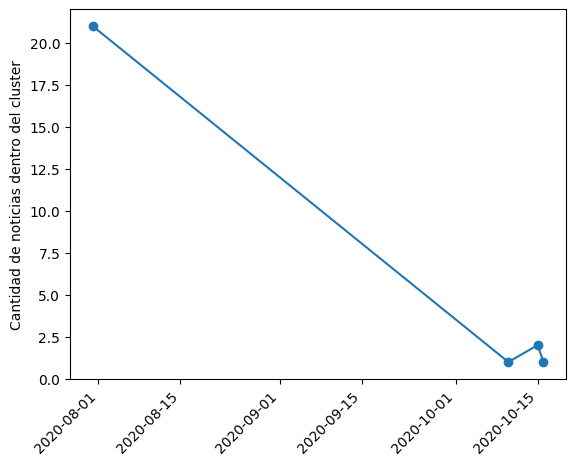

190   Postura Política Crítica. Comparte publicaciones de los trabajadores de Télam, Evo Morales y varios diputados y periodistas afines al kirchnerismo. En Facebook se pronunció en contra de Bolsonaro y pidio la liberación de Lula


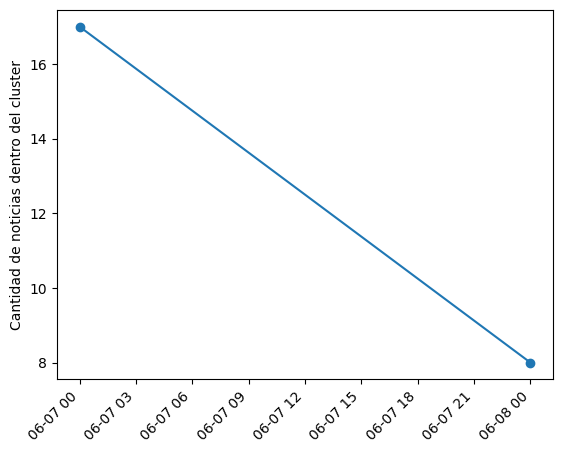

284   La propuesta conjunta (que no fue revelada públicamente) representa importantes concesiones económicas y legales de los tres grupos, incluido que los nuevos bonos emitidos a cambio de los bonos globales existentes se regirán por una versión modificada de la escritura de 2016


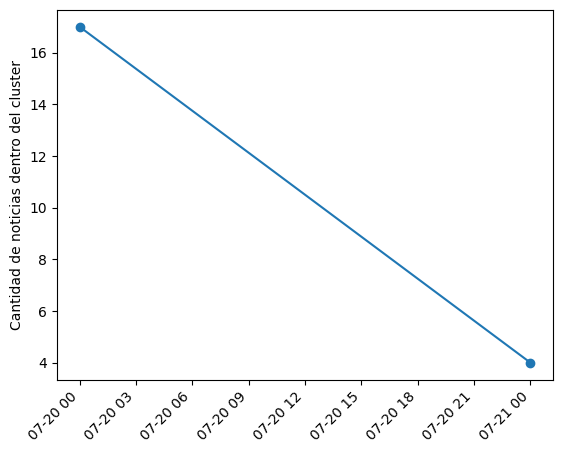

132   No va a haber elecciones porque Argentina es la campeona de las dictaduras militares. Por supuesto que puede volver a haber un golpe


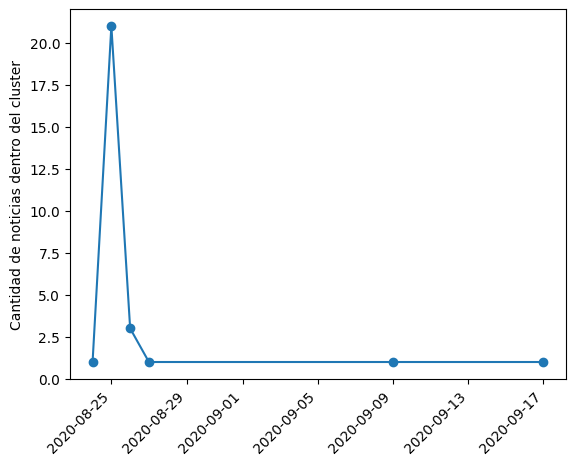

0

In [67]:
def grafico_posibles_series(df, frases_threshold):
    grouped = df.groupby(['Fecha', 'id_cluster']).size().reset_index(name='num_frases')
    clusters_id_max_30 = list(set(grouped[grouped['num_frases']>frases_threshold]['id_cluster']))
    for clus in clusters_id_max_30:
        cluster_1 = df[df['id_cluster'] == str(clus)].copy()
        cluster_1['longitud'] = cluster_1['Cita'].apply(lambda x: len(x))
        longest_phrase_row = cluster_1.loc[cluster_1['longitud'].idxmax()]['Cita']
        conteo_fechas = cluster_1['Fecha'].value_counts().reset_index()
        cont_ordenado = conteo_fechas.sort_values('Fecha')
        if len(list(set(cluster_1['Fecha']))) > 1 :
            plt.figure()
            print(clus, ' ',longest_phrase_row)
            plt.plot(cont_ordenado['Fecha'], cont_ordenado['count'], 'o-')
            plt.ylabel('Cantidad de noticias dentro del cluster')
            plt.xticks(rotation=45, ha='right')
            plt.show()
        else:
            pass
    return 0
grafico_posibles_series(sub_base, 15)

In [ ]:
from collections import Counter
frecuencia = Counter(cluste_map.values())
frecuencia

In [64]:
cluste_map
[k for k, v in cluste_map.items() if v == '100']


['los despidos sin justa causa y por las causales de falta o disminución de trabajo y fuerza mayor',
 'los despidos sin justa causa y por las causales de falta o disminución de trabajo y fuerza mayor por el plazo de 60 días',
 'Las empresas se comprometen a no realizar despidos sin justa causa o por falta o disminución de trabajo o fuerza mayor',
 'prorrogar la prohibición de efectuar despidos sin justa causa, y por las causales de falta o disminución de trabajo y fuerza mayor, por el plazo determinado',
 'los despidos sin justa causa y por las causales de falta o disminución de trabajo y fuerza mayor por el plazo de 60 días». La misma medida rige en el caso de suspensiones ']